# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [6]:
# insert code here
actual_counts = results['actual'].value_counts()
print(actual_counts)

1.0    3000
0.0    2000
Name: actual, dtype: int64


Insert comments here

According to the output, there are 2000 instances of the actual events being False and 3000 instances of the actual events being True (represented by 1.0). (represented by 0.0).

The model's predictions could be biased. because there is a small imbalance in the classes, with the number of True instances being higher than the number of False instances. This can result in misleading accuracy and inadequate learning. This can be addressed by employing strategies like undersampling the majority class, oversampling the minority class, or combining both to balance the classes and enhance model performance.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

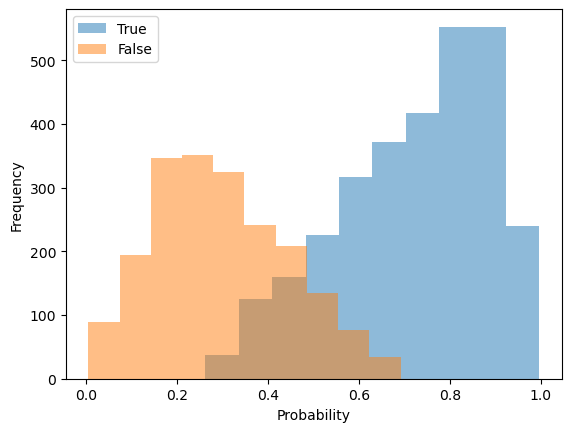

In [5]:
# insert code here
plt.hist(results[results.actual == 1]['prob'], alpha=0.5, label='True')
plt.hist(results[results.actual == 0]['prob'], alpha=0.5, label='False')
plt.legend(loc='upper left')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

Insert comments here

we could see that this is more skewed towards true value.As a result, it can be inferred that the model is more accurate at predicting True occurrences than False events. the predictions  for true class  have more accuracy

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

[[1790  210]
 [ 377 2623]]


<Axes: >

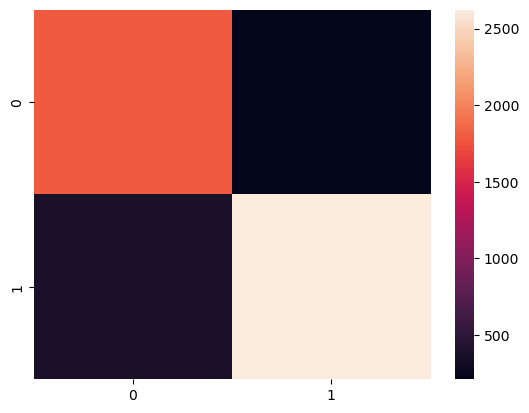

In [14]:
# insert code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.where(results['prob'] >= 0.5, 1, 0)
confusion_matrix = confusion_matrix(results['actual'], y_pred)
print(confusion_matrix)
sns.heatmap(cm)

Insert comments here

According to the confusion matrix, the model achieved 1790 True Positives (TP) and 2623 True Negatives (TN), demonstrating accuracy in classifying both positive and negative instances. However, it also identified 377 False Negatives (FN) and 210 False Positives (FP), suggesting room for improvement in precision. Enhancing precision would involve minimizing false positives and false negatives, ensuring a more reliable classification.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [12]:
# insert code here
cm = np.array([[1790, 210], [377, 2623]])
total = np.sum(cm)
accuracy = (cm[0,0] + cm[1,1]) / total
precision = cm[0,0] / np.sum(cm[:,0])
recall = cm[0,0] / np.sum(cm[0,:])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8826
Precision: 0.8260267651130595
Recall: 0.895


Insert comments here

Since the dataset in this instance is fair  accuracy, precision, and recall all offer comparable insight into the model's effectiveness. Precision and recall would be better metrics to use, though, if the dataset was unbalanced, as accuracy might be deceptive due to the prevalent class.
 I would focus on Precision because it is crucial when the cost or impact of false positives is high. Maximizing precision ensures that when the model predicts something positive, we can trust that it is genuinely positive.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [16]:
# Insert code here
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(results.actual, results.prob)
roc_auc = auc(fpr, tpr)

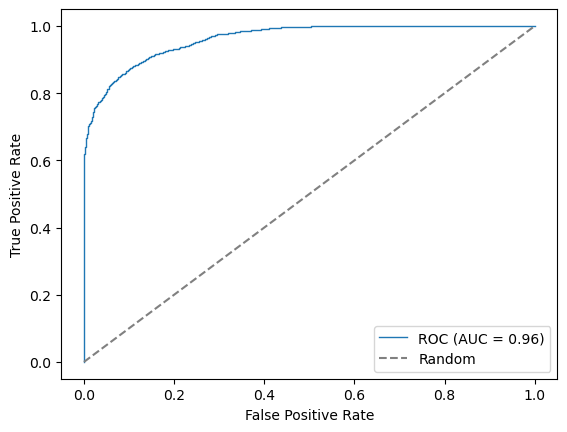

In [18]:
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Insert comments here

The model performs well, as seen by the ROC curve, which is around the top left corner and has a high AUC value. (Close to one). This demonstrates that, as is expected of a robust classification model, the model has a high true positive rate while retaining a low false positive rate.